In [1]:
import pickle
import repliclust as rpl

with open("./output/archetypes.pkl", "rb") as file:
    archetypes = pickle.load(file)

In [10]:
verbal_descriptions = [
    "twelve clusters of different distributions",
    "twelve clusters of different distributions and high class imbalance",
    "seven highly separated clusters in 10D with very different shapes",
    "seven clusters in 10D with very different shapes and significant overlap",
    "four clusters in 100D with 100 samples each",
    "four clusters in 100D with 1000 samples each"
]

archetype_names = [ arch.name for arch in archetypes ]

archetype_to_description = dict(zip(archetype_names, verbal_descriptions))

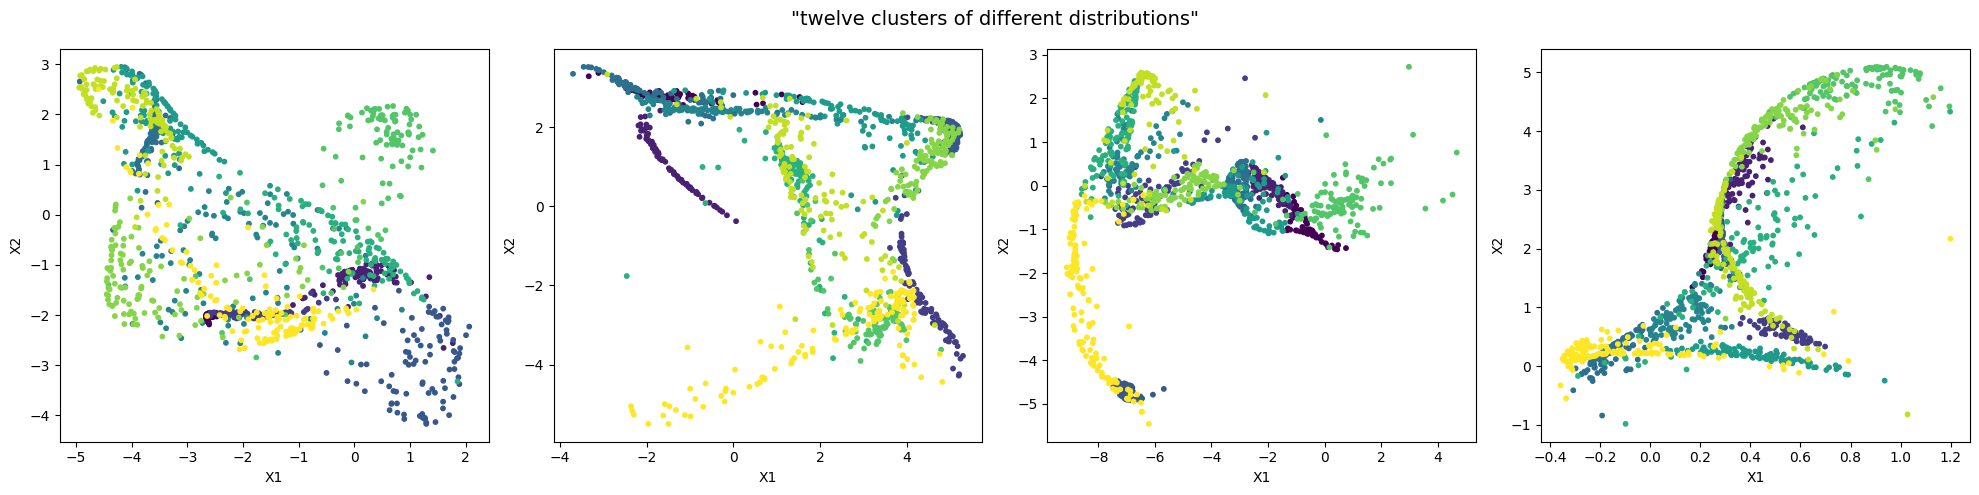

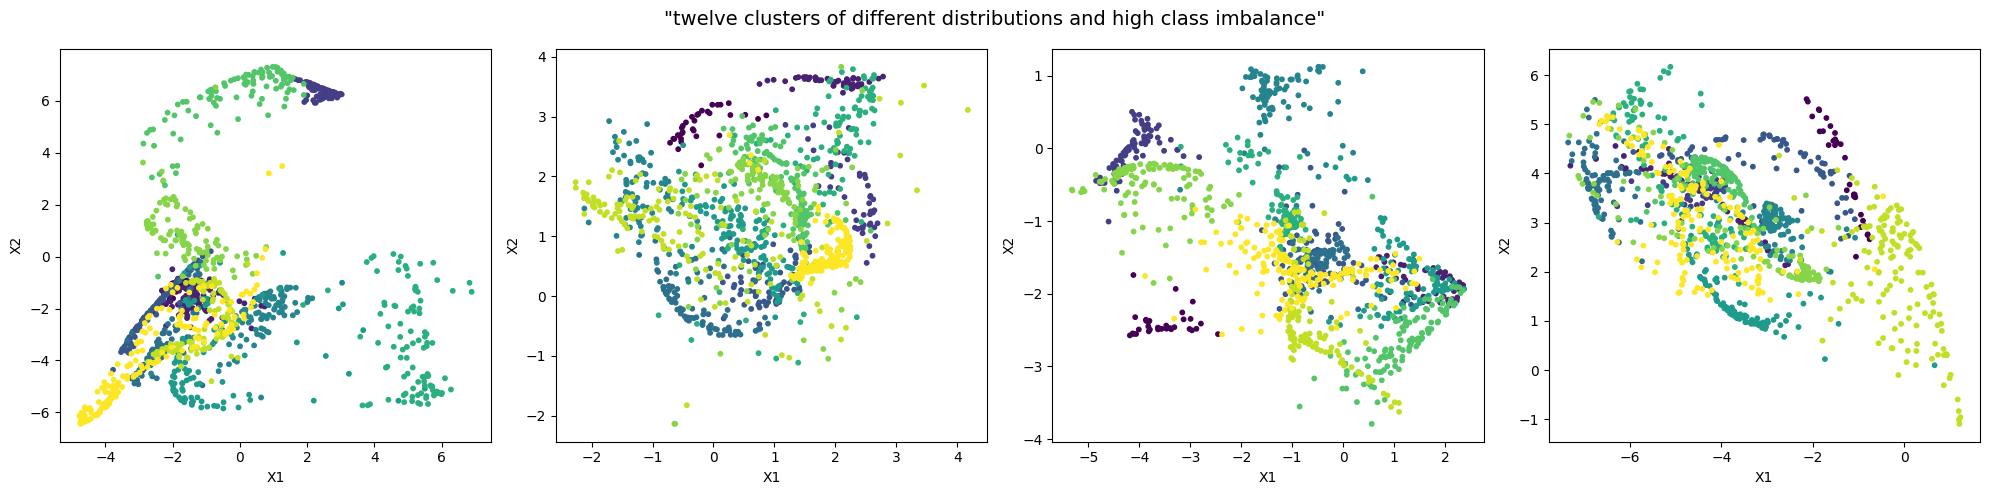

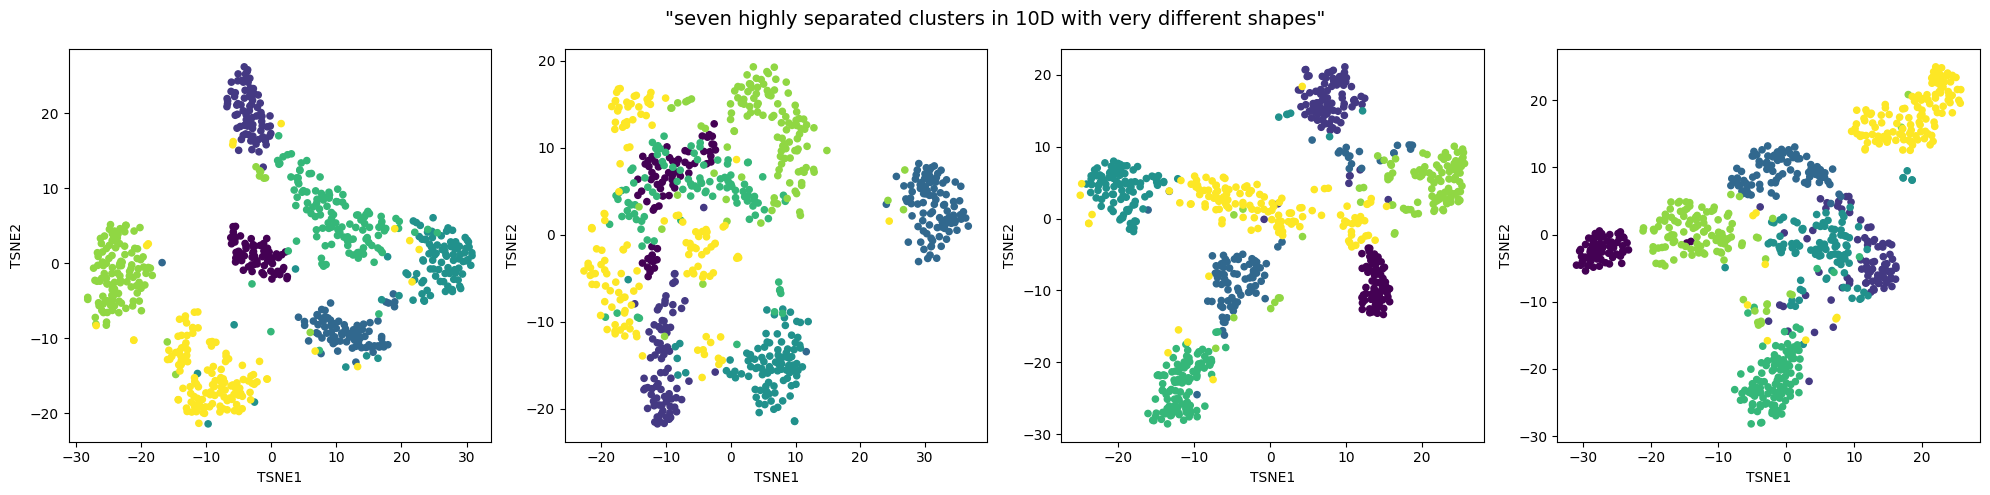

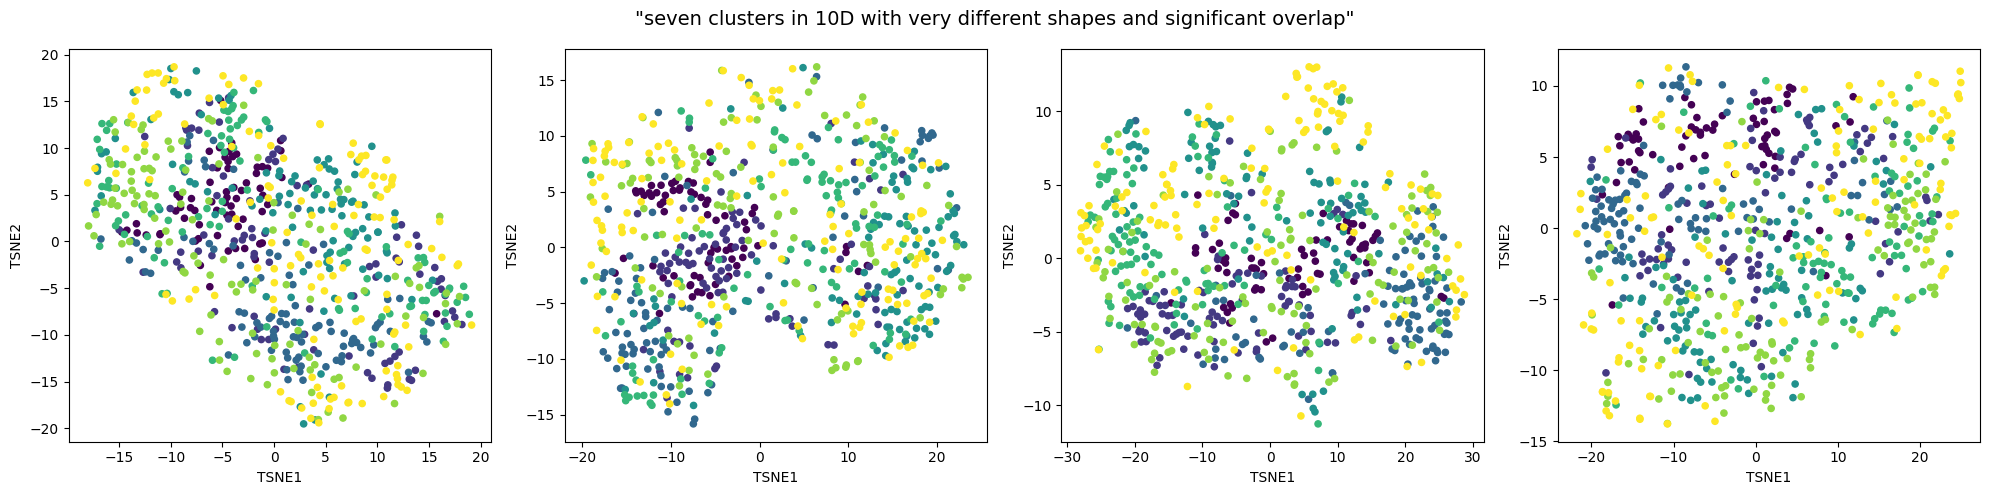

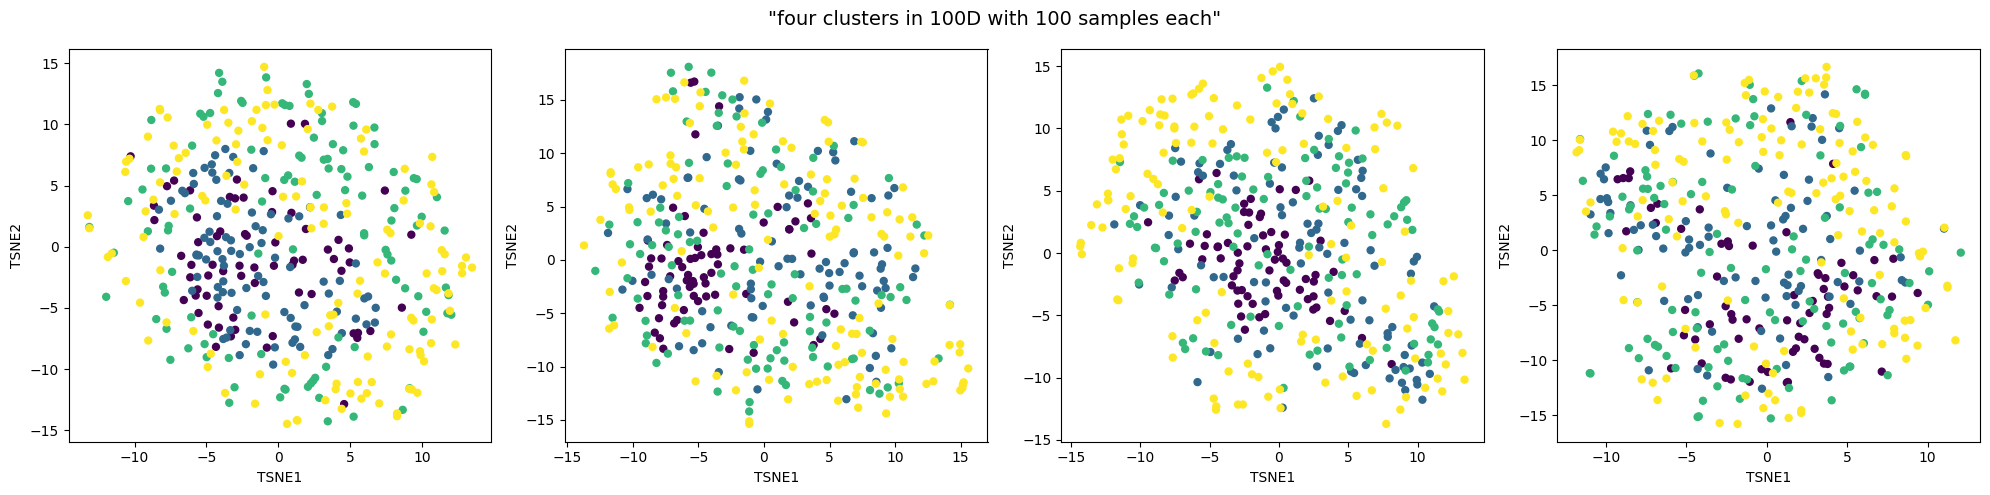

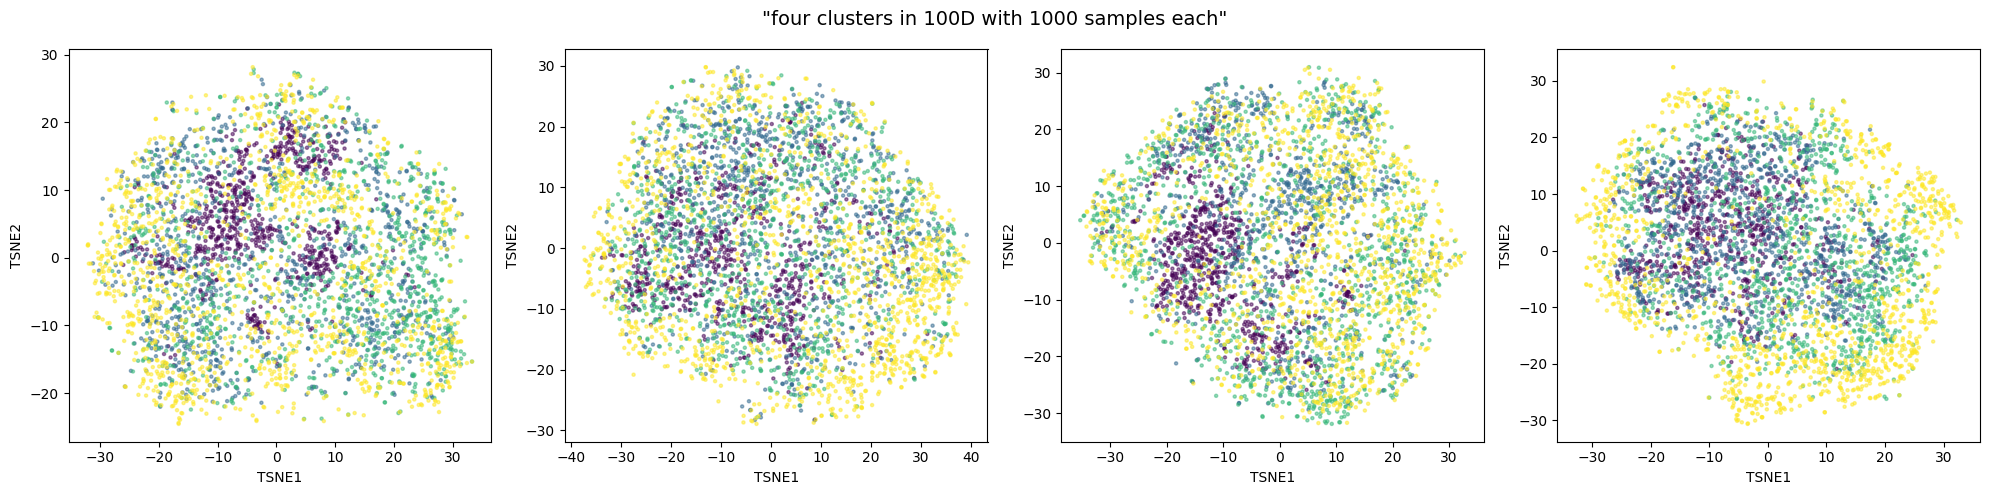

In [33]:
import matplotlib.pyplot as plt
import umap
from sklearn.manifold import TSNE
import numpy as np

s = [10,10,20,20,25,5]
perpl = [30,30,40,50,40,80]
alpha = [1,1,1,1,1,0.5]
method = [None, None, 'tsne', 'tsne', 'tsne', 'tsne']

for j, archetype in enumerate(archetypes):
    fig, axs = plt.subplots(1, 4, figsize=(20, 5))

    for i in range(4):
        X, y, _ = archetype.synthesize(quiet=True)
        X = rpl.distort(X)

        if X.shape[1] > 2:
            if method[j] == 'tsne':
                tsne = TSNE(n_components=2, perplexity=perpl[j])
                X = tsne.fit_transform(X)
                axs[i].set_xlabel("TSNE1")
                axs[i].set_ylabel("TSNE2")
            elif method[j] == 'umap':
                umap_model = umap.UMAP(n_components=2)
                X = umap_model.fit_transform(X)
                axs[i].set_xlabel("UMAP1")
                axs[i].set_ylabel("UMAP2")
        else:
            axs[i].set_xlabel("X1")
            axs[i].set_ylabel("X2")

        axs[i].scatter(X[:,0],X[:,1],alpha=alpha[j],c=y, s=s[j])

    fig.suptitle('"{}"'.format(archetype_to_description[archetype.name]), fontsize=14)
    plt.tight_layout()
plt.show()